In [328]:
import numpy as np
from scipy. integrate import odeint
import matplotlib.pyplot as plt
import sys, csv, openpyxl, copy
from IPython.display import display, Math
from eprint import eprint
from time import time as time

In [329]:
# lambda_A = 5
# lambda_B = 5
# N_A = 2
# N_B = 2
# R_A = 1
# R_B = 2
# min_A = 1
# min_B = N_B

# switch = [[N_A, N_B], [R_A, R_B]]

In [330]:
# def get_switch(index, tmp_sw):
#     tmp_switch = copy.deepcopy(tmp_sw)
    
#     tmp_switch[1][index] -= 1
    
#     # display("После изменения индекса", tmp_switch)
    
#     if tmp_switch[1][index] < 0:
#         tmp_switch[0][index] -= 1
#         tmp_switch[1][index] = 0
        
#     # display("Корректировка индекса", tmp_switch)
    
#     status = True
#     if tmp_switch[0][0] < min_A or tmp_switch[0][1] < min_B:
#         status = False
        
#     # display("возврат индекса", tmp_switch)
    
#     return [tmp_switch[0], tmp_switch[1], status]

In [331]:

# count = 1
# status = [[copy.deepcopy(switch[0]), copy.deepcopy(switch[1]), True]]
# display(N_A + R_A - min_A + N_B + R_B - min_B + 1)
# for i in range(N_A + R_A - min_A + N_B + R_B - min_B + 2):
#     for j in range((i+1) * 2):
#         print("i", i, "j", j, "count", count, "index", count - (i - j) - 1)
#         status.append(get_switch(0, status[count - (i - j) - 1]))
#         print("i", i, "j", j, "count", count, "index", count - (i - j) - 2)
#         status.append(get_switch(1, status[count - (i - j) - 2]))
#         count += 2
        


# new_status = []
# for item in status:
#     if item not in new_status:
#         new_status.append(item)

# for i in range(len(new_status)):
#     print(i, new_status[i])

In [332]:
def matrix_to_latex(matrix, fmt=".2f", zero_tol=1e-12):
    """
    Преобразует матрицу NumPy в LaTeX-формат с подписями строк и столбцов.
    
    :param matrix: 2D numpy array
    :param fmt: формат чисел (по умолчанию 2 знака после запятой)
    :param zero_tol: порог для округления к нулю
    :return: строка LaTeX
    """
    n_rows, n_cols = matrix.shape
    rows = []

    # Шапка с номерами столбцов
    header = " & " + " & ".join(f"{j}" for j in range(n_cols)) + r" \\"
    rows.append(header)

    # Строки с номерами строк
    for i in range(n_rows):
        formatted_row = [f"{i}"]  # номер строки
        for val in matrix[i]:
            if abs(val) < zero_tol:
                formatted_row.append("0")
            else:
                formatted_row.append(format(val, fmt))
        rows.append(" & ".join(formatted_row) + r" \\")

    # Собираем LaTeX
    body = "\n".join(rows)
    latex_str = "\n\\begin{array}{r" + "r" * n_cols + "}\n" + body + "\n\\end{array}\n"
    return latex_str


In [333]:
def vector_to_latex(vector):
    """
    Преобразует список чисел в LaTeX-строку для отображения вектора в виде матрицы.
    :param vector: список чисел (вектор)
    :return: строка с LaTeX-кодом
    """
    latex_str = "\\begin{bmatrix} " + " \\\\ ".join(f"{x:.4f}" for x in vector) + " \\end{bmatrix}"
    return latex_str

In [334]:

wb = openpyxl.load_workbook("intense_matrix.xlsx")
ws = wb.active

intense_matrix_shift = []

for row in ws.iter_rows(values_only=True):
    intense_matrix_shift.append([i for i in row])
    
intense_matrix_shift = np.array(intense_matrix_shift)

intense_matrix_shift = np.delete(intense_matrix_shift, 0, axis=0)
intense_matrix_shift = np.delete(intense_matrix_shift, 0, axis=1)


len_matrix = len(intense_matrix_shift)

kolmagorova_matrix = np.zeros((len_matrix, len_matrix))

for i in range(len_matrix):
    for j in range(len_matrix):        
        kolmagorova_matrix[i][i] -= intense_matrix_shift[i][j]
        kolmagorova_matrix[j][i] += intense_matrix_shift[i][j]
        
intense_matrix = copy.deepcopy(intense_matrix_shift)
for i in range(len(intense_matrix)):
    intense_matrix[i][i] = -np.sum(intense_matrix_shift[i])
        
display(Math("\\text{Матрица переходов}\\\\" + f"{matrix_to_latex(intense_matrix_shift)}"))
display(Math("\\text{Матрица интенисивностей}\\\\" + f"{matrix_to_latex(intense_matrix)}"))
display(Math("\\text{Матрица для уравнений Колмогорова}\\\\" + f"{matrix_to_latex(kolmagorova_matrix)}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [335]:
equation = "\\begin{equation}\\\\ \\begin{cases} "

for i in range(len_matrix):
    equation += "\\frac{dP_{" + f"{i}" + "}}{dt} = "
    counter = 0
    for j in range(len_matrix):
        if abs(kolmagorova_matrix[i][j]) > 1e-12:
            if counter and kolmagorova_matrix[i][j] > 0:
                equation +="+"
            equation += f"{kolmagorova_matrix[i][j]}P_"+ "{" + f"{j}" + "}"
            counter += 1
    equation += "\\\\"
equation += "\\end{cases}\\\\ \\end{equation} \\\\"

display(Math("\\text{Уравнения Колмогорова}\\\\" + equation))

<IPython.core.display.Math object>

In [336]:

display(Math("\\text{Установившийся режим работы системы описывается уравнениями Колмогорова, где значение производных равно нулю}"))
display(Math("Q^T\\cdot P(t) = 0"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [337]:
equation = "\\begin{equation}\\\\ \\begin{cases} "

for i in range(len_matrix):
    counter = 0
    for j in range(len_matrix):
        if abs(kolmagorova_matrix[i][j]) > 1e-12:
            if counter and kolmagorova_matrix[i][j] > 0:
                equation +="+"
            equation += f"{kolmagorova_matrix[i][j]}P_"+ "{" + f"{j}" + "}(t)"
            counter += 1
    equation += "=0\\\\"
equation += "\\end{cases}\\\\ \\end{equation} \\\\"

display(Math("\\text{Уравнения Колмогорова для установившегося режима}\\\\" + equation))

<IPython.core.display.Math object>

In [338]:
p0 = np.zeros(len(intense_matrix_shift))
p0[-1] = 1

tmp_kolm_matrix = copy.deepcopy(kolmagorova_matrix)
tmp_kolm_matrix[-1] = 1

solve_no_shifting = np.linalg.solve(tmp_kolm_matrix, p0)
display(Math(f"{matrix_to_latex(tmp_kolm_matrix)}"))
display(Math(f"{vector_to_latex(solve_no_shifting)}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [339]:
broken = [7, 11, 14, 15, 13, 10]

# Вычисление вероятности отказа системы
p_broken_sum = 0
for i in range(len(solve_no_shifting)):
    if i in broken:
        p_broken_sum += solve_no_shifting[i]
        
        
# Вычисление готовых к эксплуатации устройств
wb = openpyxl.load_workbook("worked_A_type.xlsx")
ws = wb.active
worked_A_matrix = []
for row in ws.iter_rows(values_only=True):
    worked_A_matrix.append(row[0])
worked_A_matrix = np.array(worked_A_matrix)
worked_A_mean = np.dot(worked_A_matrix, solve_no_shifting)

wb = openpyxl.load_workbook("worked_B_type.xlsx")
ws = wb.active
worked_B_matrix = []
for row in ws.iter_rows(values_only=True):
    worked_B_matrix.append(row[0])
worked_B_matrix = np.array(worked_B_matrix)
worked_B_mean = np.dot(worked_B_matrix, solve_no_shifting)


# Вычисление коэффициента загрузки ремонтной службы
wb = openpyxl.load_workbook("repairing.xlsx")
ws = wb.active
repairing_matrix = []
for row in ws.iter_rows(values_only=True):
    repairing_matrix.append(row[0])
repairing_matrix = np.array(repairing_matrix)
repairing_mean = np.dot(repairing_matrix, solve_no_shifting)

display(Math("\\text{Вероятность отказа системы: }" + f"{p_broken_sum:.5f}"))
display(Math("\\text{Число готовых к эксплуатации устройств типа А: }" + f"{worked_A_mean:.5f}"))
display(Math("\\text{Число готовых к эксплуатации устройств типа В: }" + f"{worked_B_mean:.5f}"))
display(Math("\\text{Коэффициент загрузки ремонтной службы: }" + f"{repairing_mean:.5f}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [340]:
def dpdt(p, t):
    return np.dot(kolmagorova_matrix, p)

In [341]:
def evklidova_norm(p, q):
    len_q = len(q)
    len_p = len(p)
        
    sum_q_p = 0
    for i in range(len_p):
        sum_q_p += (p[i] - q[i]) ** 2
    return np.sqrt(sum_q_p)

In [342]:
t = np.linspace( 0, 1, 100)

p0 = np.zeros(len(intense_matrix))
p0[0] = 1
p = odeint(dpdt, p0, t)
new_t = []
new_p = []
i = 0


while evklidova_norm(p[i], solve_no_shifting) > 0.01 and i < len(p) - 1:
    new_t.append(t[i])
    new_p.append(p[i])
    i += 1

t_shift = new_t[-1]

for j in range(i):
    new_t.append(t[i+j-1])
    new_p.append(p[i+j-1])

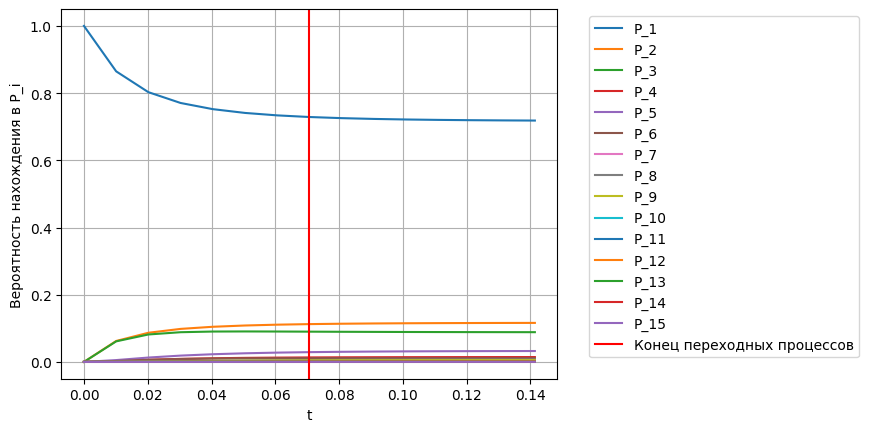

In [343]:
new_p = np.array(new_p).T


for i in range(len_matrix):
    plt.plot(new_t, new_p[i], '-', label=f"P_{i+1}")
    
plt.axvline(t_shift, color="red", linestyle='-', label="Конец переходных процессов")
plt.ylabel("Вероятность нахождения в P_i")
plt.xlabel("t")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [344]:
mark_matrix = np.zeros((len_matrix, len_matrix))

for i in range(len_matrix):
    for j in range(len_matrix):
        if intense_matrix_shift[i][j]:
            mark_matrix[i][j] = intense_matrix_shift[i][j]/np.sum(intense_matrix_shift[i])

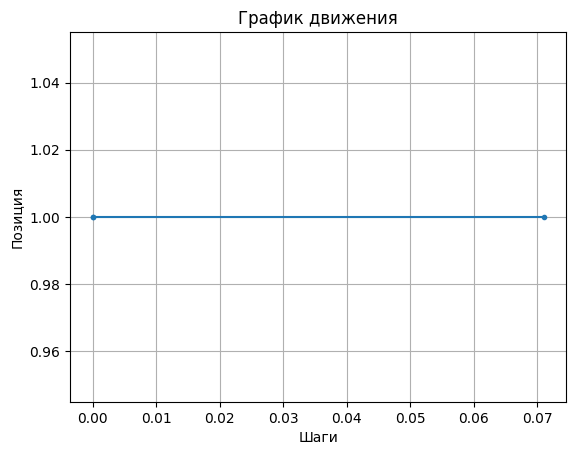

In [389]:
position_entry_matrix = []


program_entry_matrix = np.zeros((len_matrix, len_matrix))
for i in range(len_matrix):
    program_entry_matrix[i][0] = mark_matrix[i][0]
    for j in range(1, len_matrix):
        program_entry_matrix[i][j] = program_entry_matrix[i][j-1] + mark_matrix[i][j]

t = 0
t_count = 100
t_step = 1 / (t_count * 10)
start_position = 0
current_position = start_position
prev_position = -1

position_entry = {}
position_history = [[0, int(start_position) + 1]]

while t < t_shift:
    
    current_prob = np.random.default_rng(int(time()) + int(t*t_count)).integers(1,100)/100
    next_position = 0
    while current_prob > program_entry_matrix[current_position][next_position]:
        next_position += 1
    
    lambda_i = -intense_matrix[current_position, current_position]  # Суммарная интенсивность выхода
    if lambda_i > 0:
        t_freeze = np.log(np.random.uniform(int(time()))%1) / -lambda_i  # Генерация экспоненциального времени
    else:
        t_freeze = np.inf  # Остаемся в этом состоянии навсегда
    t_freeze += t

    t_start = t
    while t < t_freeze and t < t_shift or t == t_start:
        t+= t_step
    
    position_history.append([t_start, current_position + 1])
    position_history.append([t, current_position + 1])
        
    prev_position = current_position
    current_position = next_position
    position_entry[current_position] = position_entry.get(current_position, 0) + 1
    
        
        
steps, positions = zip(*position_history)
plt.plot(steps, positions, marker='.', linestyle='-')
plt.xlabel("Шаги")
plt.ylabel("Позиция")
plt.title("График движения")
plt.grid(True)
plt.show()

    # position_entry_matrix.append([[i], [position_entry[k] for k in range(len(position_entry))]])

    

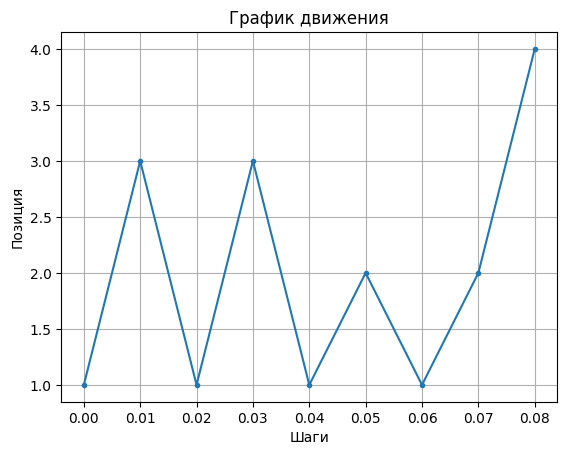

In [391]:

position_entry_matrix = []
uptimes = []

program_entry_matrix = np.zeros((len_matrix, len_matrix))
for i in range(len_matrix):
    program_entry_matrix[i][0] = mark_matrix[i][0]
    for j in range(1, len_matrix):
        program_entry_matrix[i][j] = program_entry_matrix[i][j-1] + mark_matrix[i][j]

start_position = 0
    
current_position = start_position
prev_position = -1

position_history = [[0, int(start_position)+1]]
position_entry = {}
t = 0
t_step = 1/ t_count
while current_position + 1 not in broken and t < t_shift:
    current_prob = np.random.default_rng(int(time()) + int(t*t_count)).integers(1,100)/100
    next_position = 0
    while current_prob > program_entry_matrix[current_position][next_position]:
        next_position += 1
    
    prev_position = current_position
    current_position = next_position
    position_entry[current_position] = position_entry.get(current_position, 0) + 1
    t += t_step
    position_history.append([t, current_position + 1])
    
    
    
steps, positions = zip(*position_history)
plt.plot(steps, positions, marker='.', linestyle='-')

plt.xlabel("Шаги")
plt.ylabel("Позиция")
plt.title("График движения")
plt.grid(True)
plt.show()

    # position_entry_matrix.append([[i], [position_entry[k] for k in range(len(position_entry))]])

    